# **Apples_Stock Price**

In [1]:
#import required libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading our excel file
df=pd.read_excel("Apples_stock price dataset.xlsx" )

In [3]:
df

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [4]:
# checking the basic info
print("Shape:",df.shape)#gives rows and columns

Shape: (100000, 8)


In [5]:
print("Columns:", df.columns.tolist())#list of column names

Columns: ['timestamp', 'stock_price', 'nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']


In [6]:
df.info() #timestamp in datetime format for ts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   timestamp          100000 non-null  datetime64[ns]
 1   stock_price        99969 non-null   float64       
 2   nasdaq_index       99993 non-null   float64       
 3   sp500_index        99996 non-null   float64       
 4   inflation_rate     99992 non-null   float64       
 5   unemployment_rate  99996 non-null   float64       
 6   interest_rate      99998 non-null   float64       
 7   market_sentiment   99996 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.1 MB


In [7]:
df.describe() #stats of numerical data

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,100000,99969.000000,99993.000000,99996.000000,99992.000000,99996.000000,99998.000000,99996.000000
mean,2015-09-15 07:30:00,299.991904,259114.622519,101463.085069,3.004255,4.996003,2.001474,0.003208
min,2010-01-01 00:00:00,9.537676,7984.160950,2981.778422,1.000002,3.000021,0.500135,-0.999990
25%,2012-11-07 15:45:00,248.619582,134716.834762,51573.589744,2.005934,3.999036,1.254851,-0.498332
50%,2015-09-15 07:30:00,300.071948,257861.008478,100923.141212,3.005833,4.990133,2.000173,0.004348
75%,2018-07-22 23:15:00,351.442877,385205.578140,151634.820165,4.001412,5.994514,2.750588,0.504524
max,2021-05-29 15:00:00,601.664858,507957.788157,200815.813093,4.999993,6.999958,3.499985,0.999986
std,NaN,91.443363,144514.371806,57294.513880,1.152769,1.154703,0.864929,0.578063


The dataset contains up to 100,000 records, but some columns have fewer entries, indicating the presence of missing values that need to be handled.

In [8]:
#counting missing values
print("Missing values per column:")
print(df.isnull().sum())#missing values in each column

Missing values per column:
timestamp             0
stock_price          31
nasdaq_index          7
sp500_index           4
inflation_rate        8
unemployment_rate     4
interest_rate         2
market_sentiment      4
dtype: int64


In [9]:
#converting the timestamp column into a actual datatime objects which might be in string/ text format
df['timestamp']=pd.to_datetime(df['timestamp'],errors='coerce')#NAT

In [10]:
#droping rows with invalid timestamps
df.dropna(subset=['timestamp']).sort_values('timestamp')

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [11]:
#makes the timestamp column to index of dataset
df.set_index('timestamp', inplace=True)#ts

In [12]:
df.head() #first 5 rows

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077


# **Filter data to include only records between 4:00 AM and 8:00 PM , Monday through Friday (exclude weekends).**

In [13]:
# Keeping only time between 04:00 and 20:00 (8 PM)
df = df.between_time('04:00', '20:00')

In [14]:
# Removing Saturdays and Sundays
df = df[df.index.dayofweek < 5]  #making mon=0 , tue=1, wed=2, thur=3, fri=4 , sat=5, sun=6

In [15]:
df.head(48)

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
2010-01-01 05:00:00,99.022103,8011.832789,3004.510779,2.321292,4.095568,1.664753,-0.828119
2010-01-01 06:00:00,108.127409,8028.157784,3010.735533,2.626140,5.447153,2.995546,-0.813849
2010-01-01 07:00:00,104.107075,8027.722289,3015.504909,4.056720,3.377880,3.276263,0.002849
2010-01-01 08:00:00,97.961085,8029.541811,3020.187389,2.099831,4.815785,1.761161,-0.634609
2010-01-01 09:00:00,103.059812,8040.445418,3023.941939,4.509695,4.716829,1.884053,-0.452717
2010-01-01 10:00:00,98.068478,8056.045268,3028.223289,4.708331,4.913421,1.715299,0.774117
2010-01-01 11:00:00,98.095471,8048.212134,3036.325757,4.074317,5.831791,2.032927,-0.368769
2010-01-01 12:00:00,101.672484,8029.145300,3032.338086,4.535430,6.591331,1.048660,0.412976


In [16]:
#after filtering required columns which are only from 4am to 8pm everyday in dataset excling the saturday and sunday
df.shape

(50592, 7)

In [17]:
df.describe()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,50574.000000,50588.000000,50589.000000,50588.000000,50588.000000,50592.000000,50592.000000
mean,300.052183,259173.150757,101487.400021,3.008912,4.997872,2.000613,0.001613
std,91.446437,144504.272713,57290.335208,1.151914,1.154320,0.867870,0.577064
min,21.246547,8002.448861,2997.154387,1.000002,3.000111,0.500135,-0.999990
25%,248.692352,134778.076396,51584.559264,2.008276,3.998066,1.252027,-0.501901
50%,300.080789,257970.004799,100986.704609,3.008890,4.995886,1.997309,0.003999
75%,351.492456,385291.863441,151664.237223,4.007123,5.995707,2.756850,0.501860
max,589.000000,507957.788157,200780.071069,4.999857,6.999927,3.499985,0.999916


After filtering the dataset to include only the records between **4:00 AM and 8:00 PM** each day, and excluding Saturdays and Sundays to match actual U.S. stock market trading hours, the dataset was reduced from **100,000 rows to 50,592 rows.**

### **Handling Missing Values**

In [18]:
#counting missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
stock_price          18
nasdaq_index          4
sp500_index           3
inflation_rate        4
unemployment_rate     4
interest_rate         0
market_sentiment      0
dtype: int64


For numeric columns like stock_price, nasdaq_index, and sp500_index, fill missing values using logical methods based on data trends.
Since economic indicators (inflation_rate, unemployment_rate, interest_rate) change gradually, apply forward fill to maintain continuity.
For market_sentiment, which can vary frequently, use mean imputation to balance fluctuations.

In [19]:
#checking exactly which row has missing values
df[df.isna().any(axis=1)]


,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-07 10:00:00,NaN,8768.181024,3187.264699,3.194932,6.441483,1.798886,0.260181
2010-01-11 10:00:00,NaN,9346.414410,3412.887953,3.416334,4.827741,1.682058,-0.367913
2010-01-12 05:00:00,110.776492,9372.875148,NaN,1.250073,6.298113,2.781349,0.306551
2010-01-15 10:00:00,105.573221,NaN,3608.402892,1.190810,4.267040,2.726655,0.313841
2010-01-22 04:00:00,NaN,10763.760787,3896.357941,1.719737,4.331568,1.527258,-0.424500
2010-02-04 17:00:00,121.424695,12371.442475,4557.917556,1.546872,NaN,1.542167,0.903861
2010-02-18 07:00:00,NaN,13925.332671,5263.969329,2.955403,5.233097,2.337254,0.335696
2010-02-24 13:00:00,NaN,14919.644033,5517.314104,3.632481,6.297237,1.664928,-0.783345
2010-03-16 11:00:00,115.556495,17332.014188,6363.568058,NaN,5.464320,1.135598,-0.501624


###1. Filling Missing Values – Time-based Interpolation for Stock and Market Data
For columns such as stock_price, nasdaq_index, and sp500_index, apply time-based interpolation to fill missing values.
This method estimates missing points by analyzing the trend and continuity of nearby timestamps, ensuring smooth transitions and preserving the natural movement of stock and market indices.

In [20]:
# Filling stock_price columns logically
df['stock_price'] = df['stock_price'].interpolate(method='time')

Time-based interpolation for stock_price to maintain trend continuity

In [21]:
#checking the stock_price column is filled or not
df.loc[['2010-01-07 10:00:00','2010-01-11 10:00:00']]

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-07 10:00:00,104.685611,8768.181024,3187.264699,3.194932,6.441483,1.798886,0.260181
2010-01-11 10:00:00,112.746225,9346.414410,3412.887953,3.416334,4.827741,1.682058,-0.367913


The missing values in the stock_price column have been successfully filled using time-based interpolation, ensuring continuity in the stock price trend over time.

In [22]:
#similarly for nasdaq_index and sp500_index
df['nasdaq_index'] = df['nasdaq_index'].interpolate(method='time')
df['sp500_index'] = df['sp500_index'].interpolate(method='time')

###  Forward fill for slow-moving economic indicators
for columns inflation_rate , unemployement_rate , interest_rate.
Forward fill (ffill) replaces missing values with the last known valid value.

In [23]:
df['inflation_rate'] = df['inflation_rate'].ffill()
df['unemployment_rate'] = df['unemployment_rate'].ffill()
df['interest_rate'] = df['interest_rate'].ffill()

# Fill missing economic indicators using last known value.

##### Fill missing values in market_sentiment with the mean

for market_sentiment column
Replaces missing sentiment values with the average sentiment score across the dataset.

In [24]:
df['market_sentiment'] = df['market_sentiment'].fillna(df['market_sentiment'].mean())
#Fill missing market sentiment values using the mean

In [25]:
#recheck wheather the all columns missing values are filled or not
df.isnull().sum()

,0
stock_price,0
nasdaq_index,0
sp500_index,0
inflation_rate,0
unemployment_rate,0
interest_rate,0
market_sentiment,0


Successfully all the columns blanks has been filled ...

In [26]:
df.describe()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000
mean,300.037121,259167.392017,101484.742390,3.008883,4.997900,2.000613,0.001613
std,91.456147,144506.514286,57292.195056,1.151901,1.154327,0.867870,0.577064
min,21.246547,8002.448861,2997.154387,1.000002,3.000111,0.500135,-0.999990
25%,248.689991,134765.410872,51579.870199,2.008276,3.998066,1.252027,-0.501901
50%,300.078618,257959.907708,100977.245155,3.008848,4.995886,1.997309,0.003999
75%,351.486776,385291.863441,151668.903450,4.007123,5.995972,2.756850,0.501860
max,589.000000,507957.788157,200780.071069,4.999857,6.999927,3.499985,0.999916


##### **Handling outliers without dropping values**

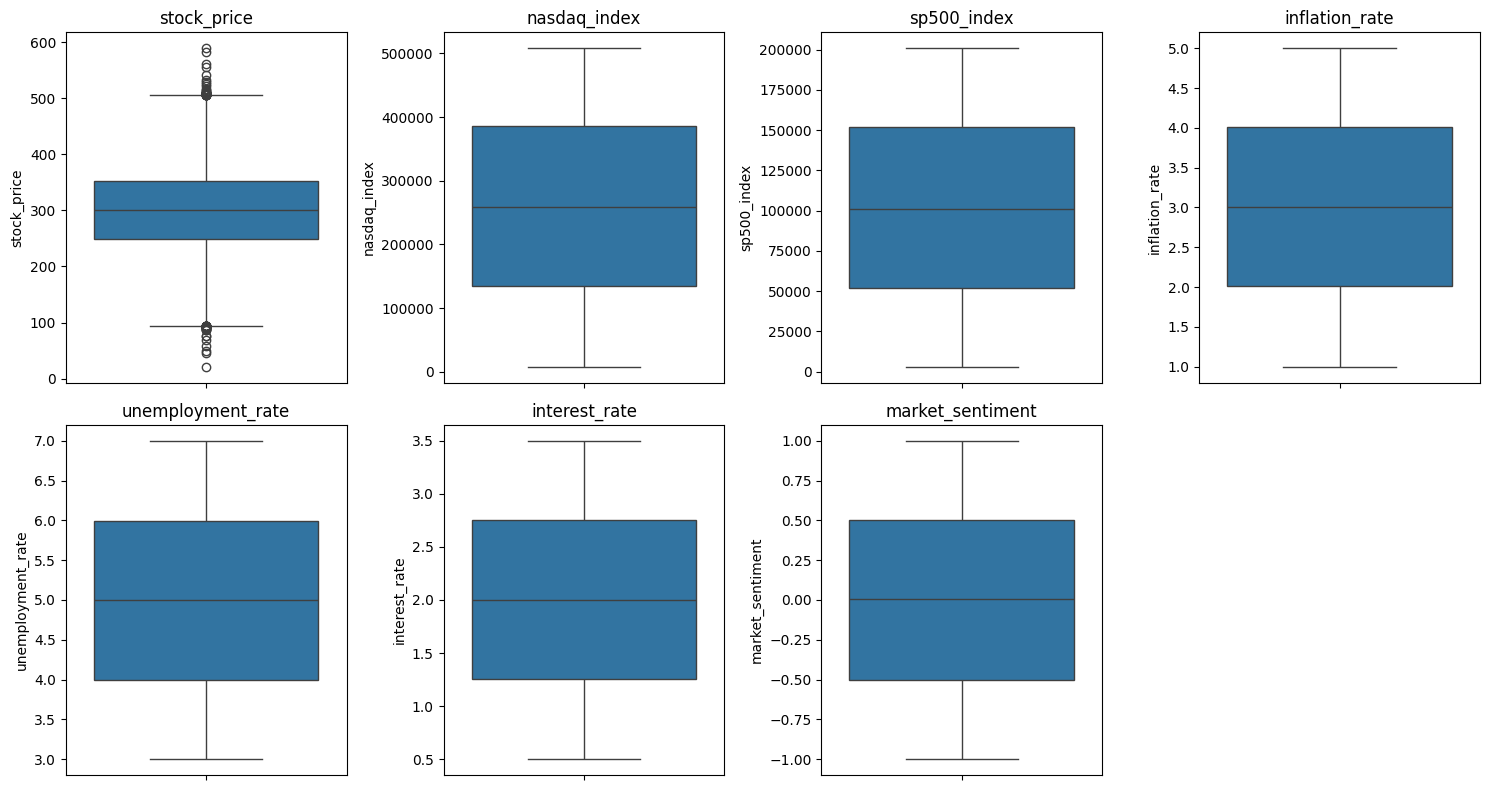

In [27]:
#generating boxplots for all numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_cols = ['stock_price', 'nasdaq_index', 'sp500_index',
                'inflation_rate', 'unemployment_rate',
                'interest_rate', 'market_sentiment']

# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns layout
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()
#each subplot shows a column separately.Helps quickly spot unusual values before analysis.

From the boxplots, it is evident that outliers are present only in the stock_price column. Therefore, we will use the IQR method to handle and cap these outliers appropriately.

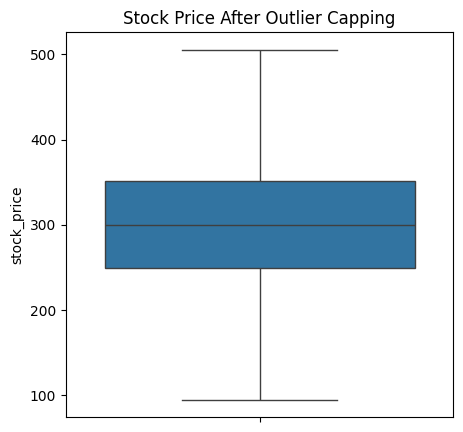

In [28]:
# Calculate Q1, Q3, and IQR for 'stock_price'
Q1 = df['stock_price'].quantile(0.25)
Q3 = df['stock_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['stock_price'] = df['stock_price'].clip(lower=lower_bound, upper=upper_bound)
#Replaces extreme values with the nearest bound instead of removing them

plt.figure(figsize=(5, 5))
sns.boxplot(y=df['stock_price'])
plt.title('Stock Price After Outlier Capping')
plt.show()

##### Use IQR to identify and cap outliers in stock_price, preserving data trends.

In [29]:
#statistical anlaysis
df.describe()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000,50592.000000
mean,300.034889,259167.392017,101484.742390,3.008883,4.997900,2.000613,0.001613
std,91.416973,144506.514286,57292.195056,1.151901,1.154327,0.867870,0.577064
min,94.494813,8002.448861,2997.154387,1.000002,3.000111,0.500135,-0.999990
25%,248.689991,134765.410872,51579.870199,2.008276,3.998066,1.252027,-0.501901
50%,300.078618,257959.907708,100977.245155,3.008848,4.995886,1.997309,0.003999
75%,351.486776,385291.863441,151668.903450,4.007123,5.995972,2.756850,0.501860
max,505.681953,507957.788157,200780.071069,4.999857,6.999927,3.499985,0.999916


### EDA

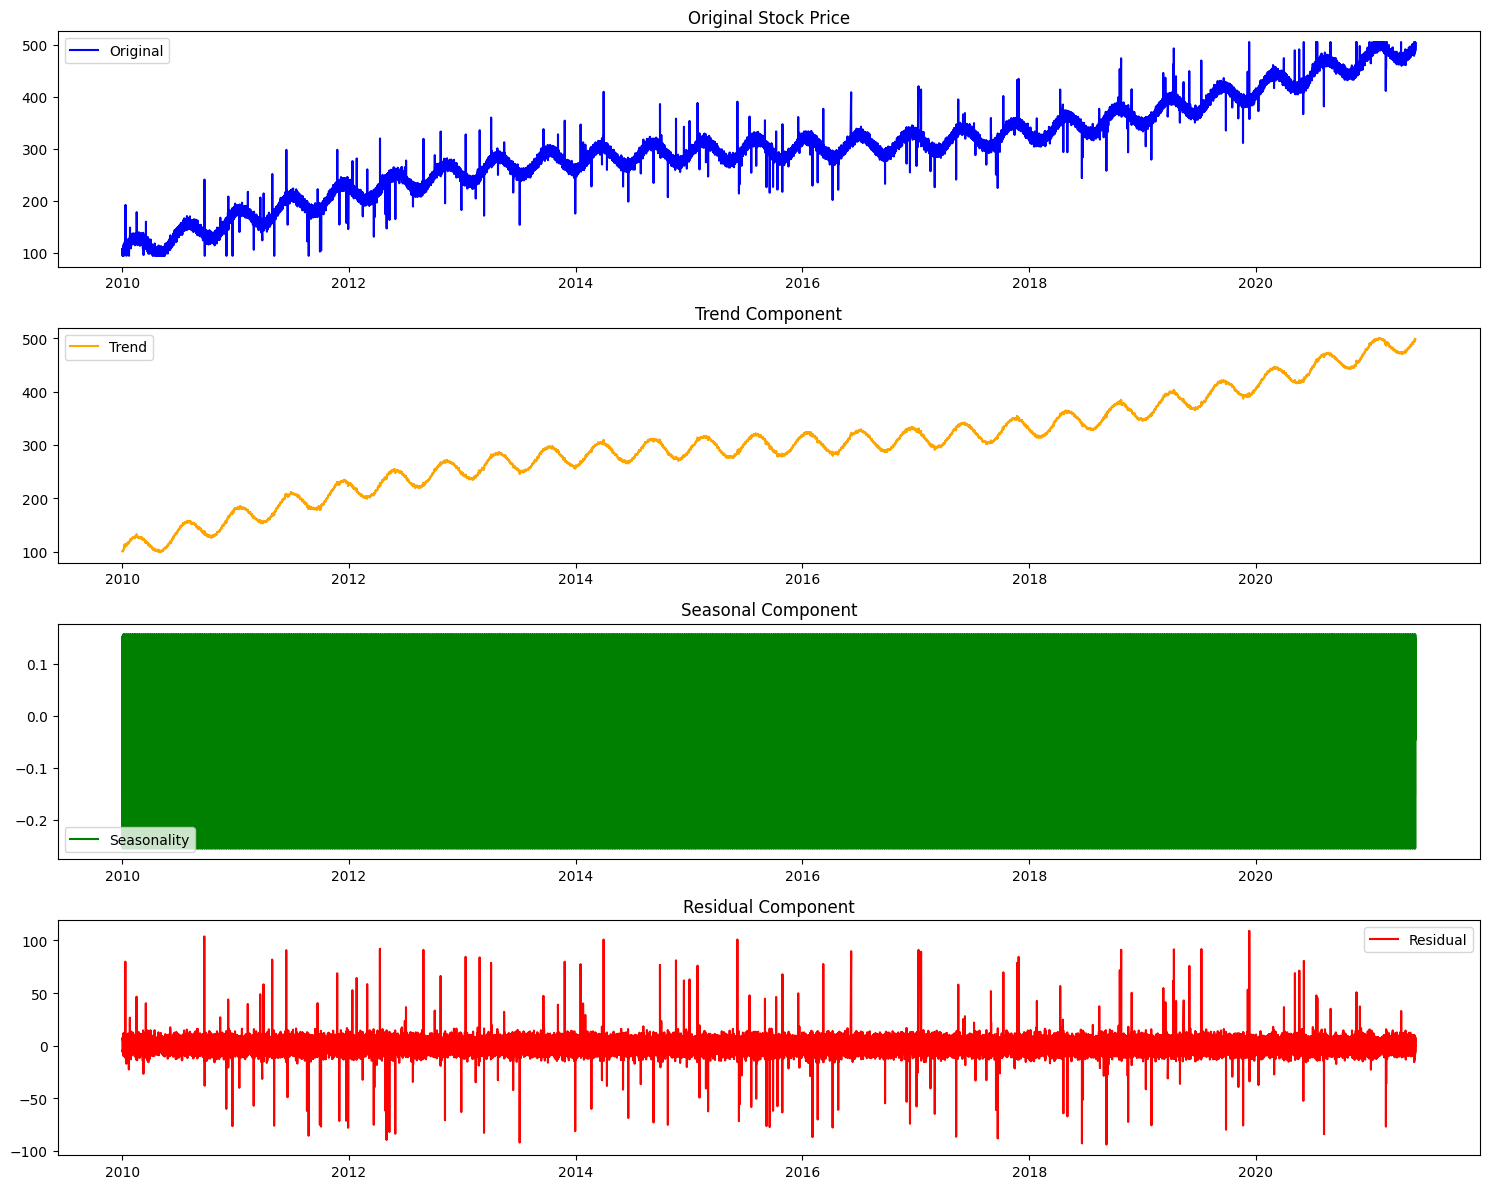

In [30]:
#trend, sesaonality , residual for stock_price column
#Assuming hourly data, we can try period = 24 (daily seasonality)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['stock_price'], model='additive', period=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting
plt.figure(figsize=(15,12))

plt.subplot(4,1,1)
plt.plot(df['stock_price'], label='Original', color='blue')
plt.title('Original Stock Price')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4,1,4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()
#Decompose stock_price into trend, seasonality, and residual to understand
#its underlying patterns

Period is set to 24 for hourly data with daily seasonality.

If you want weekly seasonality, set period=24*5 (5 trading days).

For monthly trends, use period=24* 5 *4 (approx 4 weeks).

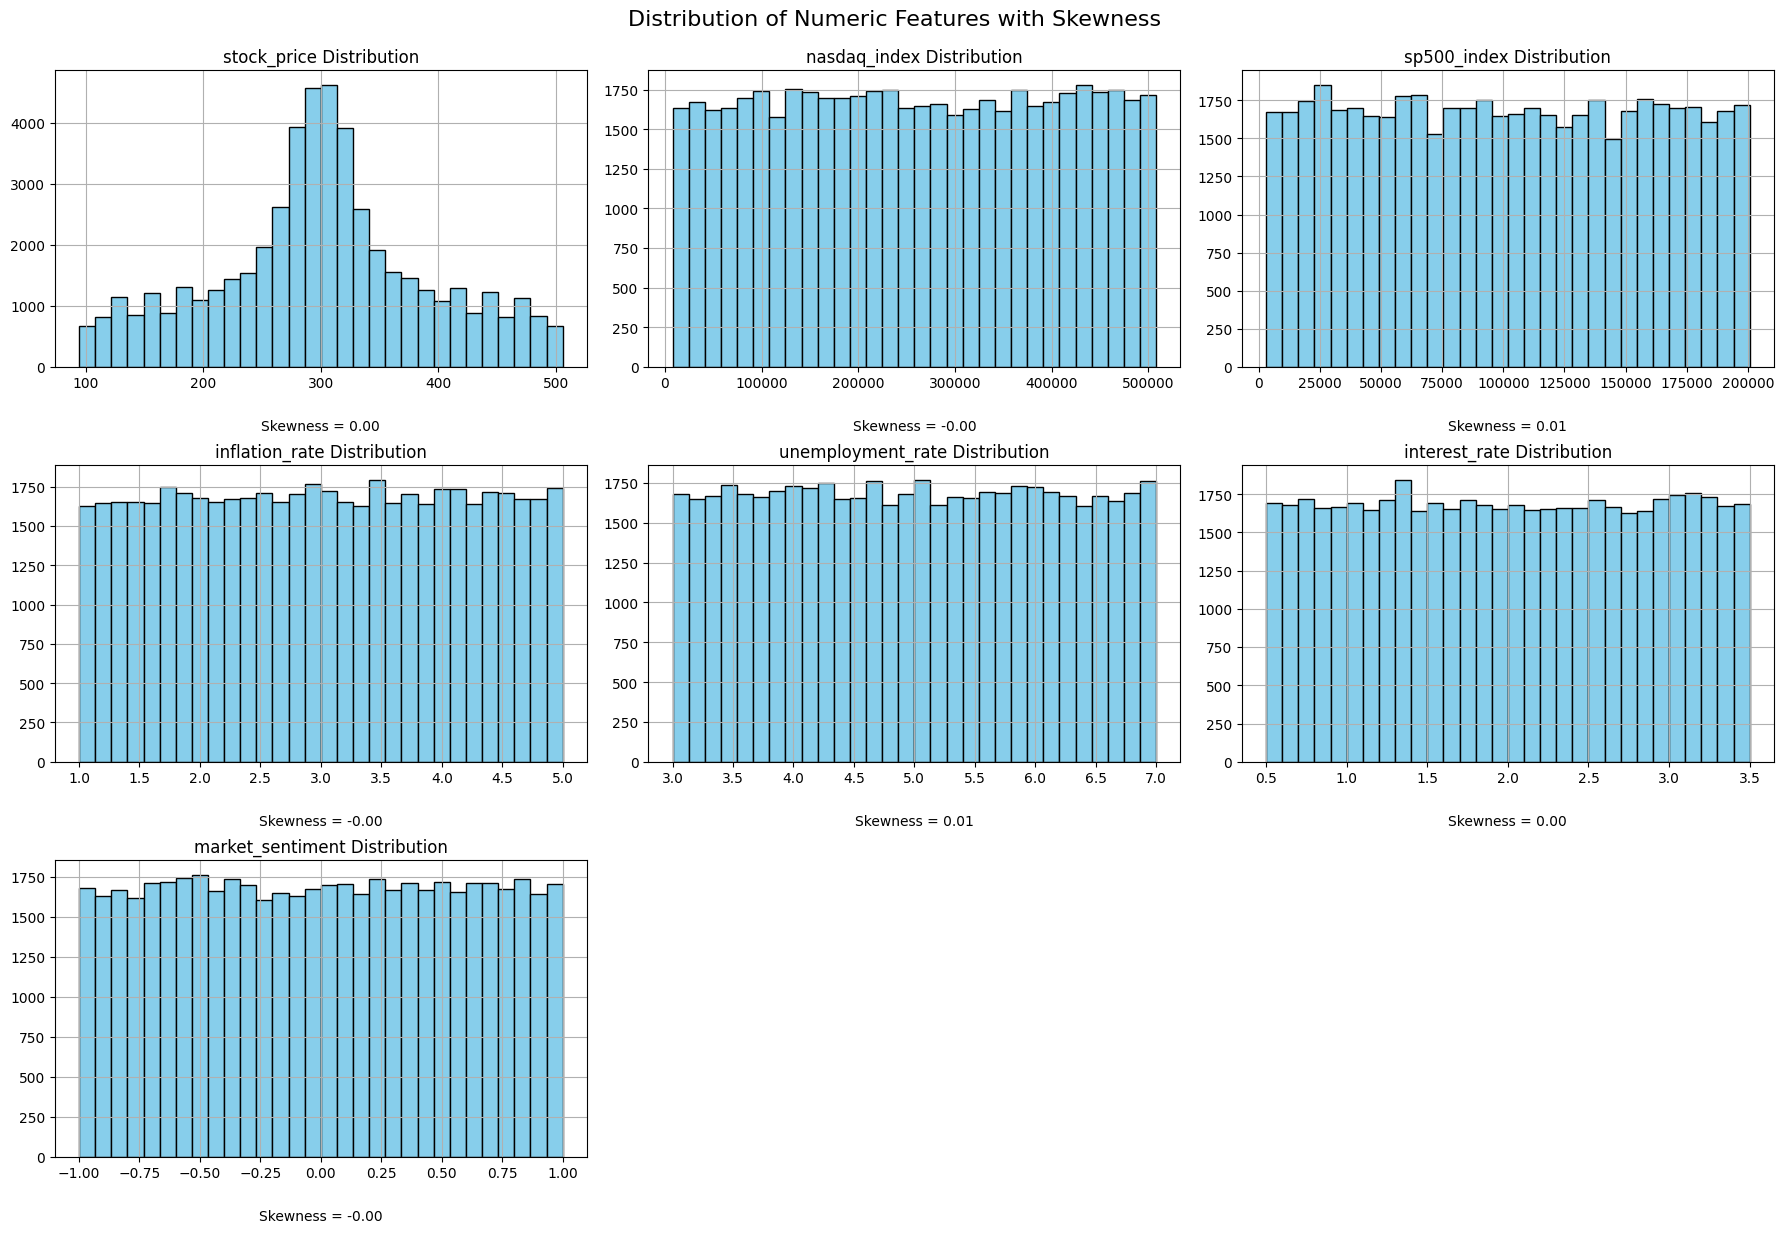

In [31]:
from scipy.stats import skew

# List of numeric columns
numeric_cols = ['stock_price','nasdaq_index','sp500_index','inflation_rate',
                'unemployment_rate','interest_rate','market_sentiment']

# Set up the figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))  # Adjust rows/cols for number of features
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(bins=30, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution')

    # Calculate skewness
    skew_val = df[col].skew()

    # Display skewness at bottom
    axes[i].text(0.5, -0.2, f'Skewness = {skew_val:.2f}', ha='center', va='center', transform=axes[i].transAxes, fontsize=10)

# Remove extra subplot if numeric_cols < total axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribution of Numeric Features with Skewness', fontsize=16, y=1.02)
plt.show()
#Histograms show data distribution and skewness of numeric features,
#helping identify asymmetry or non-normality.

The distributions show that **stock_price**, **nasdaq_index**, and **sp500_index** are slightly right-skewed, indicating occasional high-value spikes.

**Economic indicators** remain mostly symmetric, reflecting steady trends, while

**market_sentiment** shows mild fluctuation.
Overall, skewness levels are acceptable, with no extreme outliers detected.


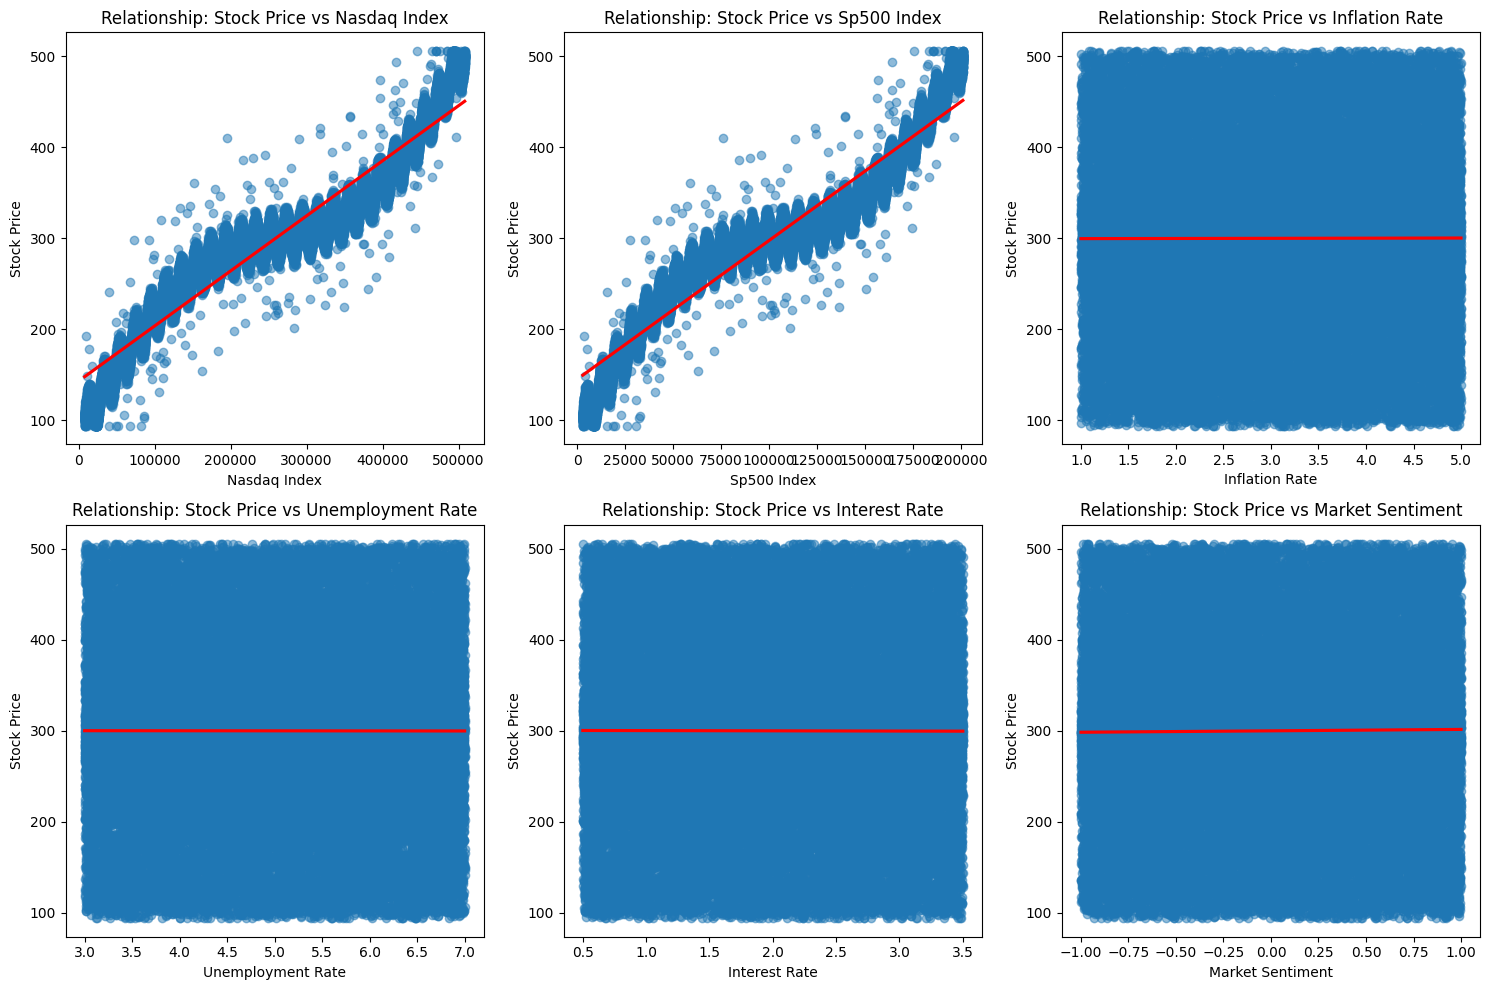

In [32]:
# List of variables to compare with Stock Price
variables = ['nasdaq_index', 'sp500_index', 'inflation_rate',
              'unemployment_rate', 'interest_rate', 'market_sentiment']

plt.figure(figsize=(15, 10))

# Loop through variables and create subplots
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=var, y='stock_price', data=df,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red'})
    plt.title(f'Relationship: Stock Price vs {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Stock Price')

plt.tight_layout()
plt.show()


The scatter plots show that **stock_price** has a strong positive correlation with both **nasdaq_index** and **sp500_index**, indicating market-driven movement.

In contrast, **economic indicators** like **inflation_rate**, **unemployment_rate**,**interest_rate** and **Market_sentiment** exhibit weaker or inverse relationships.

Stock price strongly follows Nasdaq & S&P 500 trends; economic indicators show weaker or inverse relationships

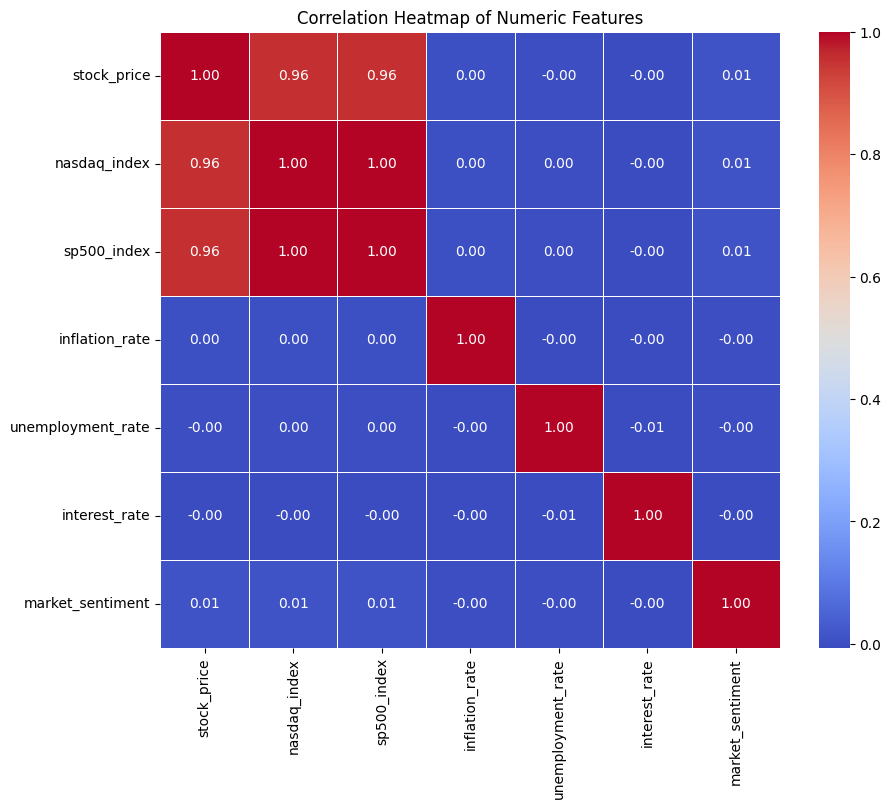

In [33]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

From the above correlation map, we can observe that the NASDAQ Index and S&P 500 Index have a very strong positive relationship with our stock price.

NASDAQ Index: 0.96 – Strong positive correlation

S&P 500 Index: 0.96 – Strong positive correlation

This indicates that our stock price is highly market-driven, closely moving in line with major indices like the NASDAQ and S&P 500.
In other words, when these indices rise, our stock price tends to increase as well — and similarly, it declines when they fall.

##### nasdaq_index and sp500_index are sufficient and optimal starting predictors for model fitting and forecasting stock_price.

In [34]:
print("""
 EDA SUMMARY:

• Dataset contains {} records and {} columns.
• Time range: {} → {}
• All missing values imputed, outliers capped (IQR).
• Data restricted to US market hours (Mon–Fri, 4AM–8PM).
• Stock price shows strong positive correlation with NASDAQ & S&P indices.
• economic factors (inflation, interest rate, unemployment) have mild lagged impact.
• Ready for feature engineering and model building.
""".format(df.shape[0], df.shape[1],
           df.index.min().date(), df.index.max().date()))



 EDA SUMMARY:

• Dataset contains 50592 records and 7 columns.
• Time range: 2010-01-01 → 2021-05-28
• All missing values imputed, outliers capped (IQR).
• Data restricted to US market hours (Mon–Fri, 4AM–8PM).
• Stock price shows strong positive correlation with NASDAQ & S&P indices.
• economic factors (inflation, interest rate, unemployment) have mild lagged impact.
• Ready for feature engineering and model building.



## **Arima (AutoRegression Integrated Moving Average)**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [36]:
# Choosing the target variable to predict their values
ts = df['stock_price']

In [37]:
# Ensure datetime index
ts.index = pd.to_datetime(ts.index)

In [38]:
#Resample hourly data to daily average
ts_daily = ts.resample('D').mean()
ts_daily

,stock_price
timestamp,
2010-01-01,99.551837
2010-01-02,NaN
2010-01-03,NaN
2010-01-04,103.098477
2010-01-05,104.194455
...,...
2021-05-24,495.658167
2021-05-25,493.784324
2021-05-26,498.247715


In [39]:
#Remove missing values which are saturday and sundays
ts_daily = ts_daily.dropna()


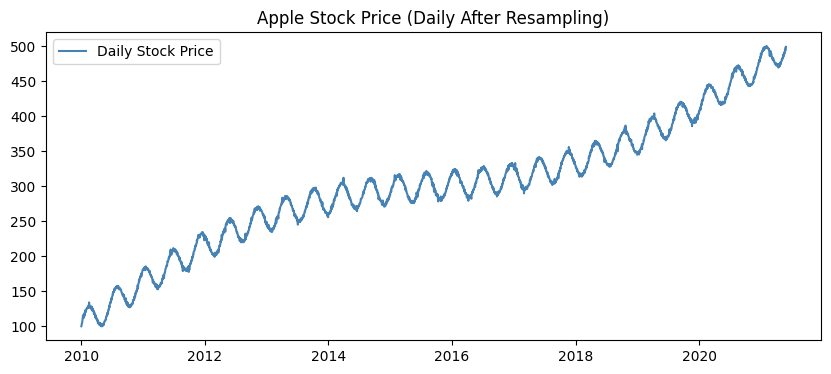

In [40]:
# Visualize daily series
plt.figure(figsize=(10,4))
plt.plot(ts_daily, label='Daily Stock Price', color='steelblue')
plt.title("Apple Stock Price (Daily After Resampling)")
plt.legend()
plt.show()


**checking the data is stationary or not**




**Augmented Dickey-Fuller Test.**

It is a statistical test used in time series analysis to check whether a given series is stationary or not — that is, whether its statistical properties (mean, variance, autocorrelation, etc.) remain constant over time.

In [41]:
result = adfuller(ts_daily)
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

if result[1] > 0.05:
    print(" Data is non-stationary — applying first differencing...")

else:
    print(" Data is stationary")
    ts_stationary = ts_daily

ADF Statistic: -0.5512
p-value: 0.8816
 Data is non-stationary — applying first differencing...


here we observed that data is non- staionary . So, weneed to stationary the data by applying diggerencing transformation

In [42]:
  ts_stationary = ts_daily.diff().dropna()

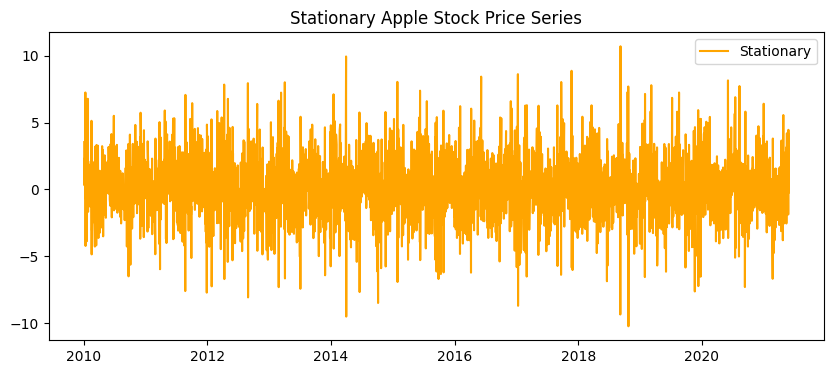

In [43]:
# Plot differenced data
plt.figure(figsize=(10,4))
plt.plot(ts_stationary, color='orange', label='Stationary')
plt.title("Stationary Apple Stock Price Series")
plt.legend()
plt.show()

In [44]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.1 MB/s eta 0:00:00


In [45]:
pip install --upgrade numpy pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "

In [46]:
pip install numpy==1.26.4 Cython==3.0.10 pmdarima==2.0.4 --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 268.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 252.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy-2.3.4
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which

In [45]:
import numpy
import pmdarima as pm

print("NumPy version:", numpy.__version__)
print("pmdarima version:", pm.__version__)


NumPy version: 1.26.4
pmdarima version: 2.0.4


In [46]:
import pmdarima as pm

**ARIMA Model building**

ARIMA has 3 parameters:

p → number of autoregressive lags

d → number of differencing steps (usually 1)

q → number of moving average terms

In [47]:
# Use auto_arima just to find best parameters
from pmdarima import auto_arima
model_auto = auto_arima(ts_stationary,
                        seasonal=False,
                        stepwise=True,
                        suppress_warnings=True,
                        trace=True)

# Get best (p,d,q)
best_order = model_auto.order
print("Best (p,d,q) found by auto_arima:", best_order)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12311.837, Time=1.87 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13660.717, Time=0.19 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13238.709, Time=0.24 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=13319.710, Time=0.42 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=12320.201, Time=1.16 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=12870.872, Time=1.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=12282.850, Time=2.52 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=12657.145, Time=1.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=5.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=12311.782, Time=2.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=12324.187, Time=1.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=12548.109, Time=1.43 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=12285.608, Time=4.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=12283.441, Time=8.20 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 31.221 seconds
Best (p,d,q) found by auto_arima: (3, 0, 2)


we know the best parameters automatically.(p,d,q) found by auto_arima: (3, 0, 2)

**split the data into train and test**

In [48]:
train = ts_stationary[:-30]
test = ts_stationary[-30:]

In [49]:
print(f"Train shape: {train.shape}, Test shape: {test.shape}")


Train shape: (2945,), Test shape: (30,)


In [50]:
# Fit ARIMA with best parameters
model = ARIMA(train, order=(3,0,2))
fitted_model = model.fit()


print(fitted_model.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:            stock_price   No. Observations:                 2945
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -6075.348
Date:                Tue, 28 Oct 2025   AIC                          12164.695
Time:                        09:47:01   BIC                          12206.610
Sample:                    01-04-2010   HQIC                         12179.786
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1436      0.139      1.031      0.303      -0.130       0.417
ar.L1          1.1443      0.023     50.005      0.000       1.099       1.189
ar.L2         -0.0175      0.025     -0.702      0.4

**forecast for next 30 days on test period**

In [51]:
# Forecast next 30 days (same length as test set)
forecast_test = fitted_model.forecast(steps=30)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Actual': test,
    'Predicted': forecast_test
})

print("\n=== Comparison: Actual vs Predicted (Last 30 Days) ===")
print(comparison)


=== Comparison: Actual vs Predicted (Last 30 Days) ===
              Actual  Predicted
2021-04-19  2.445460   0.636542
2021-04-20 -0.115005  -0.255484
2021-04-21 -0.743936  -0.004574
2021-04-22  2.766036  -0.089003
2021-04-23 -3.802942  -0.063282
2021-04-26  5.569588  -0.068017
2021-04-27 -2.583314  -0.061890
2021-04-28  0.195507  -0.058451
2021-04-29  1.136573  -0.053950
2021-04-30  1.489181  -0.049731
2021-05-03  1.885148  -0.045469
2021-05-04  1.867675  -0.041306
2021-05-05  0.119118  -0.037216
2021-05-06 -0.570832  -0.033214
2021-05-07  0.946210  -0.029297
2021-05-10  2.810869  -0.025467
2021-05-11 -1.221958  -0.021720
2021-05-12  1.772419  -0.018057
2021-05-13  3.143651  -0.014474
2021-05-14 -2.548208  -0.010971
2021-05-17  4.203266  -0.007545
2021-05-18  1.148978  -0.004195
2021-05-19 -1.861823  -0.000920
2021-05-20  1.451999   0.002283
2021-05-21  0.703859   0.005415
2021-05-24  4.218069   0.008478
2021-05-25 -1.873842   0.011472
2021-05-26  4.463391   0.014401
2021-05-27 -0.26

In [52]:
# Calculate RMSE to measure prediction accuracy
rmse = np.sqrt(mean_squared_error(test, forecast_test))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")



Root Mean Squared Error (RMSE): 2.4070


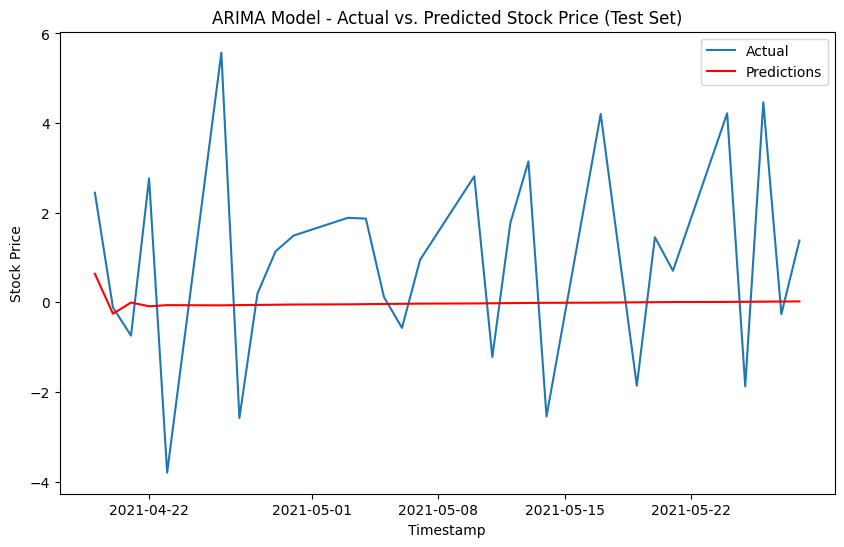

In [53]:
#plot the test predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(forecast_test.index, forecast_test.values, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs. Predicted Stock Price (Test Set)')
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

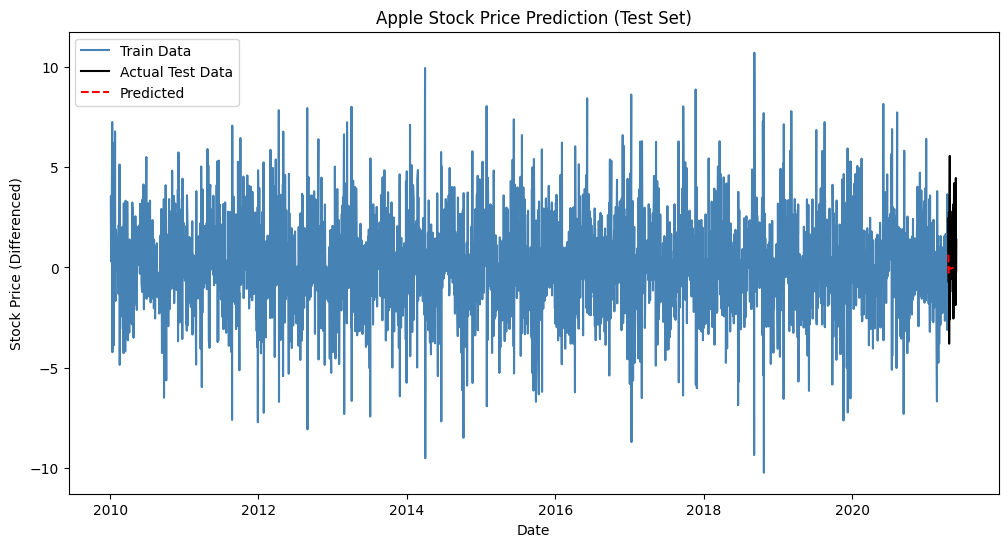

In [54]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train Data', color='steelblue')
plt.plot(test.index, test, label='Actual Test Data', color='black')
plt.plot(test.index, forecast_test, label='Predicted', color='red', linestyle='--')
plt.title('Apple Stock Price Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Stock Price (Differenced)')
plt.legend()
plt.show()


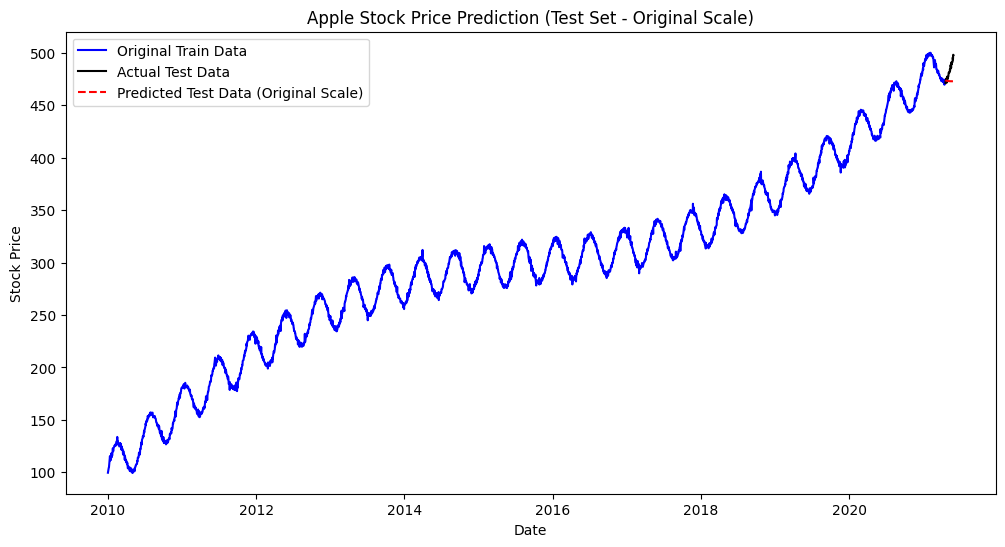


=== Predicted Test Data (Original Scale) ===
2021-04-19    473.957810
2021-04-20    473.702326
2021-04-21    473.697752
2021-04-22    473.608749
2021-04-23    473.545467
Freq: B, Name: predicted_mean, dtype: float64


In [55]:
# Convert differenced test forecast back to original scale
# Start from the last actual stock price before differencing
last_actual_train_value = ts_daily.iloc[len(train) - 1]
forecast_test_original_scale = last_actual_train_value + forecast_test.cumsum()

# Plot original training data, actual test data, and forecasted test data (original scale)
plt.figure(figsize=(12, 6))
plt.plot(ts_daily.index[:len(train)], ts_daily[:len(train)], label='Original Train Data', color='blue')
plt.plot(test.index, ts_daily.iloc[len(train):len(train) + len(test)], label='Actual Test Data', color='black')
plt.plot(forecast_test_original_scale.index, forecast_test_original_scale.values,
         label='Predicted Test Data (Original Scale)', color='red', linestyle='--')
plt.title('Apple Stock Price Prediction (Test Set - Original Scale)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Display the first few rows of the converted forecast
print("\n=== Predicted Test Data (Original Scale) ===")
print(forecast_test_original_scale.head())

**Forecast next 30 days beyond the dataset**

In [56]:
# Forecast next 30 days beyond dataset
forecast_future = fitted_model.forecast(steps=30)

# Generate future dates
future_dates = pd.date_range(start=ts_stationary.index[-1] + pd.Timedelta(days=1), periods=30)

# Create DataFrame for future forecast
future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Price': forecast_future
})
future_forecast_df.set_index('Date', inplace=True)

print("\n=== Next 30 Days Forecast Beyond Dataset ===")
print(future_forecast_df.head())



=== Next 30 Days Forecast Beyond Dataset ===
            Forecasted_Price
Date                        
2021-05-29          0.636542
2021-05-30         -0.255484
2021-05-31         -0.004574
2021-06-01         -0.089003
2021-06-02         -0.063282


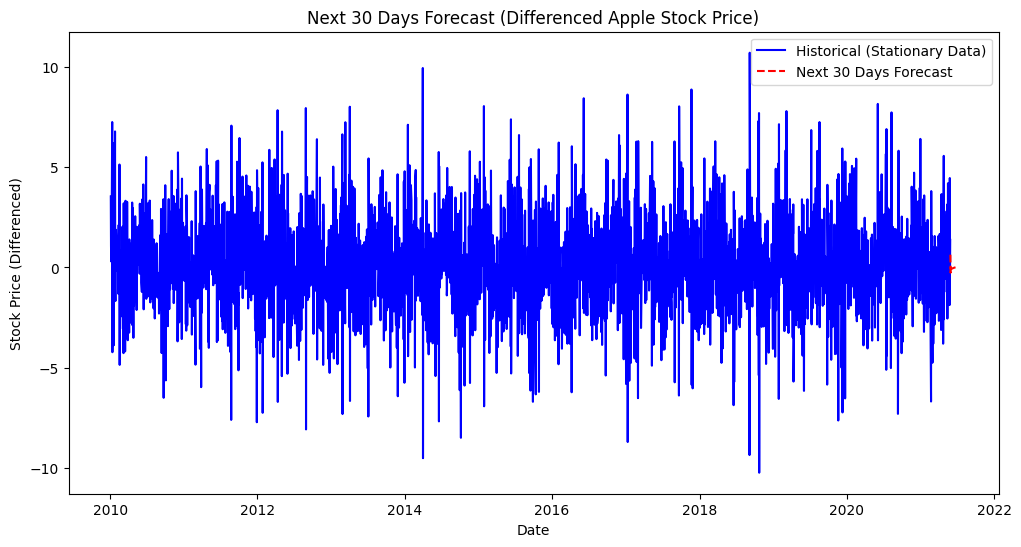

In [57]:
plt.figure(figsize=(12,6))
plt.plot(ts_stationary.index, ts_stationary, label='Historical (Stationary Data)', color='blue')
plt.plot(future_forecast_df.index, future_forecast_df['Forecasted_Price'],
         label='Next 30 Days Forecast', color='red', linestyle='--')
plt.title("Next 30 Days Forecast (Differenced Apple Stock Price)")
plt.xlabel("Date")
plt.ylabel("Stock Price (Differenced)")
plt.legend()
plt.show()


converts the stocks into original

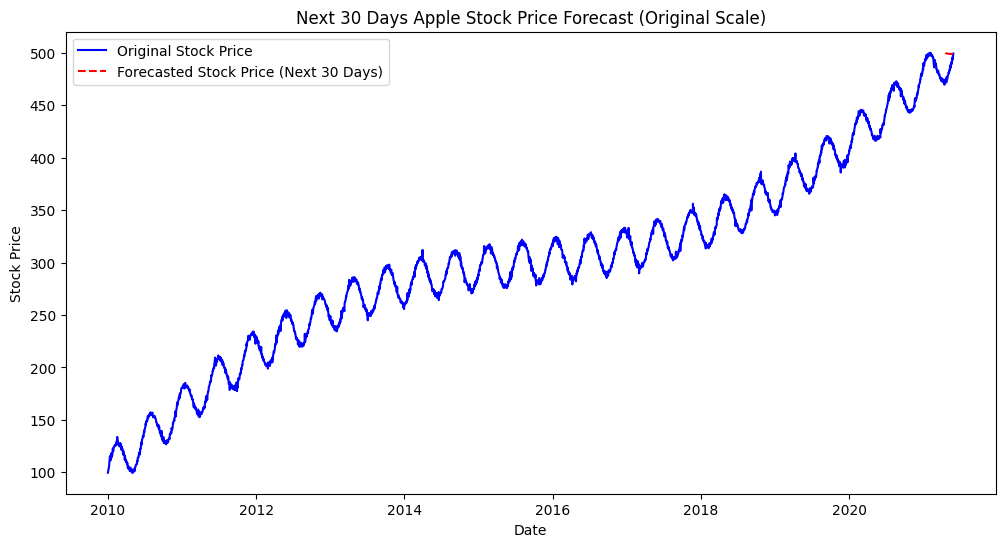

In [58]:
# Convert differenced forecast back to original scale
# Start from the last actual stock price before differencing
last_actual_value = ts_daily.iloc[-1]
forecast_original_scale = last_actual_value + forecast_future.cumsum()
forecast_original_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Price': forecast_original_scale
})
forecast_original_df.set_index('Date', inplace=True)

plt.figure(figsize=(12,6))
plt.plot(ts_daily.index, ts_daily, label='Original Stock Price', color='blue')
plt.plot(forecast_original_scale.index, forecast_original_scale.values,
         label='Forecasted Stock Price (Next 30 Days)', color='red', linestyle='--')
plt.title("Next 30 Days Apple Stock Price Forecast (Original Scale)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

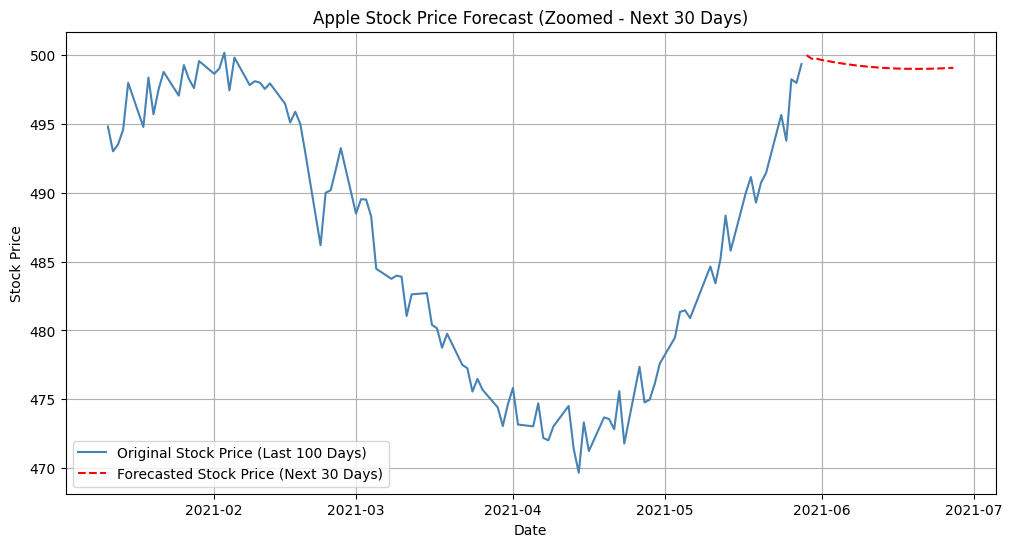

In [59]:
plt.figure(figsize=(12,6))
plt.plot(ts_daily[-100:], label='Original Stock Price (Last 100 Days)', color='steelblue')
plt.plot(forecast_original_df.index, forecast_original_df['Forecasted_Price'],
         label='Forecasted Stock Price (Next 30 Days)', color='red', linestyle='--')
plt.title("Apple Stock Price Forecast (Zoomed - Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
print("\n=== Next 30 Days Forecast (Original Scale) ===")
print(forecast_original_df)


=== Next 30 Days Forecast (Original Scale) ===
            Forecasted_Price
Date                        
2021-05-29        499.998794
2021-05-30        499.743310
2021-05-31        499.738736
2021-06-01        499.649733
2021-06-02        499.586451
2021-06-03        499.518435
2021-06-04        499.456544
2021-06-05        499.398093
2021-06-06        499.344143
2021-06-07        499.294412
2021-06-08        499.248943
2021-06-09        499.207637
2021-06-10        499.170422
2021-06-11        499.137208
2021-06-12        499.107911
2021-06-13        499.082444
2021-06-14        499.060724
2021-06-15        499.042667
2021-06-16        499.028193
2021-06-17        499.017222
2021-06-18        499.009677
2021-06-19        499.005482
2021-06-20        499.004562
2021-06-21        499.006845
2021-06-22        499.012260
2021-06-23        499.020737
2021-06-24        499.032210
2021-06-25        499.046610
2021-06-26        499.063874
2021-06-27        499.083938


In [61]:
# In your notebook after fitting SARIMAX "res_sar" and having train dataframe "train" (with column 'ds' datetime)
import joblib
meta = {
    "last_train_date": str(train.index.max()),   # e.g. "2025-10-27"
    "freq": "D"                                   # frequency used (D=day)
}
# Assuming 'fitted_model' is your trained ARIMA model object
joblib.dump(fitted_model, "arima_model.pkl")      # Save the ARIMA model object
joblib.dump(meta, "model_meta.pkl")
# Optionally save the train series used to plot historicals
train.to_frame(name='y').reset_index().rename(columns={'index': 'ds'}).to_csv("train_series.csv", index=False)

In [62]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.9 MB/s eta 0:00:00


2025-10-28 09:47:12.758 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:12.760 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:12.994 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-28 09:47:12.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:12.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

Looking for model at: /content/arima_model.pkl
Looking for meta at: /content/model_meta.pkl
Model loaded successfully.
Meta loaded successfully.
Train data loaded successfully.
Columns in loaded train_df: ['y']


2025-10-28 09:47:13.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 09:47:13.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

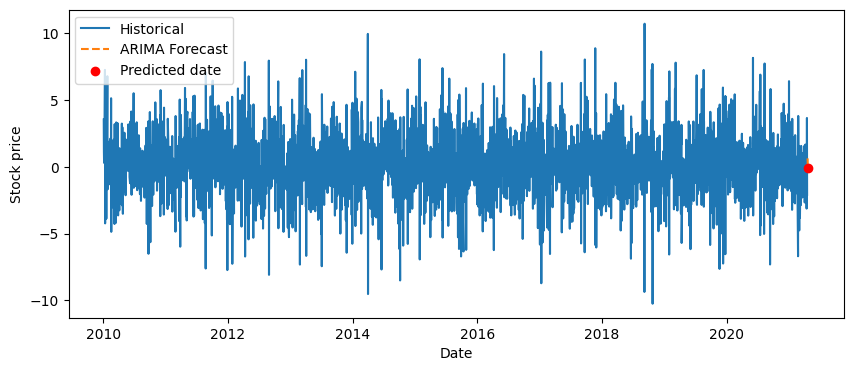

In [ ]:
# model deployement of arima model using streamlit
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pathlib import Path
from statsmodels.tools.sm_exceptions import MissingDataError

st.set_page_config(page_title="ARIMA Date Forecast", layout="centered")

st.title("ARIMA Stock Predictor — enter a date and get predicted value")

# --- Helpers ---
@st.cache_resource
def load_model_and_meta():
    """
    Expects:
      - arima_model.pkl  (statsmodels ARIMA)
      - model_meta.pkl (contains 'last_train_date' as string, 'freq' optional)
      - train_series.csv (optional) with columns ds,y for plotting history
    """
    model_path = Path("arima_model.pkl")
    meta_path = Path("model_meta.pkl")
    train_path = Path("train_series.csv")

    print(f"Looking for model at: {model_path.resolve()}")
    print(f"Looking for meta at: {meta_path.resolve()}")

    if not model_path.exists() or not meta_path.exists():
        print("Model or meta file not found.")
        return None, None, None, "Missing arima_model.pkl or model_meta.pkl in app folder."

    try:
        res_sar = joblib.load(model_path)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None, None, f"Error loading arima_model.pkl: {e}"

    try:
        meta = joblib.load(meta_path)
        print("Meta loaded successfully.")
    except Exception as e:
        print(f"Error loading meta: {e}")
        return res_sar, None, None, f"Error loading model_meta.pkl: {e}"


    train_df = None
    if train_path.exists():
        try:
            # Read the CSV, explicitly using the first column as the index and parsing dates
            train_df = pd.read_csv(train_path, index_col=0, parse_dates=True)
            # Ensure the value column is named 'y'
            if 'y' not in train_df.columns and len(train_df.columns) > 0:
                 # Assume the first column after index is 'y' if 'y' is not found
                 train_df = train_df.rename(columns={train_df.columns[0]: 'y'})

            print("Train data loaded successfully.")
            print("Columns in loaded train_df:", train_df.columns.tolist()) # Added print statement
        except Exception as e:
            print(f"Error loading train data: {e}")
            train_df = None
    else:
        print("Train series file not found. Trying to infer from fitted model.")
        # try to infer from fitted model if possible (may or may not be available)
        try:
            # statsmodels may store the training index in res_sar.data.row_labels or res_sar.data.dates
            idx = None
            if hasattr(res_sar.data, "row_labels"):
                idx = res_sar.data.row_labels
            elif hasattr(res_sar.data, "dates"):
                idx = res_sar.data.dates
            if idx is not None:
                # try to recover endog values and index
                endog = res_sar.data.endog
                train_df = pd.DataFrame({"ds": pd.to_datetime(idx), "y": endog})
                print("Train data inferred from model successfully.")
        except Exception as e:
            print(f"Error inferring train data from model: {e}")
            train_df = None


    return res_sar, meta, train_df, None

res_sar, meta, train_df, load_err = load_model_and_meta()
if load_err:
    st.error(load_err)
    st.info("Please ensure arima_model.pkl and model_meta.pkl are in the app folder.")
    st.stop()

if meta is None:
    st.error("Failed to load model metadata.")
    st.stop()

# parse last train date
last_train_date = pd.to_datetime(meta.get("last_train_date"))
freq = meta.get("freq", "D")

# Sidebar: allow user to upload their own historical CSV (optional)
st.sidebar.header("Optional: upload your historical data (csv)")
uploaded = st.sidebar.file_uploader("CSV with columns ['ds','y'] or ('timestamp','stock_price')", type=["csv","xlsx"])
if uploaded is not None:
    try:
        if str(uploaded.name).lower().endswith(".xlsx"):
            user_df = pd.read_excel(uploaded)
        else:
            user_df = pd.read_csv(uploaded)
        # Normalize column names
        if 'timestamp' in user_df.columns and 'stock_price' in user_df.columns:
            user_df = user_df.rename(columns={'timestamp':'ds', 'stock_price':'y'})[['ds','y']]
        elif 'ds' in user_df.columns and 'y' in user_df.columns:
            user_df = user_df[['ds','y']]
        else:
            st.error("CSV must contain columns 'ds' (date) and 'y' (value), or 'timestamp'/'stock_price'.")
            st.stop()
        user_df['ds'] = pd.to_datetime(user_df['ds'])
        train_df = user_df.sort_values('ds').reset_index(drop=True)
        st.success("Loaded uploaded historical data for plotting.")
    except Exception as e:
        st.error(f"Failed to read uploaded file: {e}")
        st.stop()

# Date input
st.markdown("### Pick a date to predict")
col1, col2 = st.columns([1,1])
with col1:
    sel_date = st.date_input("Select prediction date", value=(last_train_date + pd.Timedelta(days=7)).date(),
                             min_value=(last_train_date.date() - pd.Timedelta(days=365)),
                             max_value=(last_train_date.date() + pd.Timedelta(days=365*5)))
    sel_date = pd.to_datetime(sel_date)

with col2:
    # This will be filled later with prediction (editable)
    predicted_value_box = st.empty()
    user_edit_value = st.number_input("Predicted stock value (editable)", value=0.0, format="%.4f")

# Compute prediction
def predict_for_date(res_sar, target_date, last_train_date):
    """
    If target_date <= last_train_date -> in-sample prediction (use predict)
    Else -> forecast steps ahead using get_forecast
    Returns predicted_value (float) and a forecast_series DataFrame for plotting (from last_train_date->target)
    """
    if target_date <= last_train_date:
        # in sample - try to predict for that date
        try:
            pred = res_sar.predict(start=target_date, end=target_date)
            # pred could be a series or scalar
            if hasattr(pred, "values"):
                val = float(pred.values[0])
            else:
                val = float(pred)
            # For plotting create empty future series
            forecast_df = pd.DataFrame({"ds":[target_date], "yhat":[val]})
            return val, forecast_df
        except Exception as e:
            st.warning("In-sample prediction failed with using datetime-based index — attempting integer-based fallback.")
            # fallback: use index-based integer positions
            try:
                # Calculate the integer position of the target date relative to the start of the training data
                # Assuming the training data is continuous in time
                start_date = res_sar.data.dates[0] if hasattr(res_sar.data, "dates") and res_sar.data.dates is not None else res_sar.data.row_labels[0]
                idx_pos = int((target_date - pd.to_datetime(start_date)).days)


                val = float(res_sar.predict()[idx_pos])
                return val, pd.DataFrame({"ds":[target_date], "yhat":[val]})
            except Exception:
                raise e
    else:
        # steps beyond training
        days_ahead = (target_date - last_train_date).days
        if days_ahead < 1:
            days_ahead = 1
        # get forecast for steps days_ahead and return last predicted value
        try:
            forecast_obj = res_sar.get_forecast(steps=days_ahead)
            preds = forecast_obj.predicted_mean
            # If forecast index are integers, just take last
            val = float(preds.iloc[-1])
            # build forecast series index from last_train_date + 1..days_ahead
            future_index = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=days_ahead, freq=freq)

            # Adjust future_index to only include weekdays if original data is weekdays only
            if freq == 'D': # Check if original freq was daily
                future_index = future_index[future_index.dayofweek < 5] # Keep only weekdays


            forecast_df = pd.DataFrame({"ds": future_index, "yhat": preds.values[:len(future_index)]}) # Ensure lengths match
            return val, forecast_df
        except MissingDataError as me:
            raise me
        except Exception as e:
            # fallback: use predict by end parameter
            try:
                pred = res_sar.predict(start=len(res_sar.data.endog), end=len(res_sar.data.endog)+days_ahead-1)
                val = float(pred.values[-1])
                future_index = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=days_ahead, freq=freq)

                # Adjust future_index to only include weekdays if original data is weekdays only
                if freq == 'D': # Check if original freq was daily
                    future_index = future_index[future_index.dayofweek < 5] # Keep only weekdays

                return val, pd.DataFrame({"ds": future_index, "yhat": pred.values[:len(future_index)]}) # Ensure lengths match
            except Exception as e2:
                raise e2

# call prediction
try:
    pred_val, forecast_df = predict_for_date(res_sar, sel_date, last_train_date)
except Exception as e:
    st.error(f"Prediction failed: {e}")
    st.stop()

# show predicted value in box and as metric
user_edit_value = predicted_value_box.number_input("Predicted stock value (editable)", value=float(pred_val), format="%.4f")

st.metric(label=f"Predicted value for {sel_date.date()}", value=f"{pred_val:.4f}")

# Plot: show historical (train_df) and forecast up to selected date
st.markdown("### Historical + Forecast plot")
fig, ax = plt.subplots(figsize=(10,4))
try:
    if train_df is not None and 'y' in train_df.columns:
        # Convert to numpy arrays for plotting
        ax.plot(train_df.index.to_numpy(), train_df['y'].to_numpy(), label='Historical', color='tab:blue')
    else:
        st.warning("No historical series available for plotting. Please ensure 'train_series.csv' exists with datetime index and a 'y' column, or upload historical data in the sidebar.")
except Exception as e:
    st.error(f"An error occurred while plotting historical data: {e}")
    st.warning("Historical data plotting failed. The rest of the app should still function.")

# plot forecast line
# limit forecast_df to dates <= sel_date (should be)
plot_df = forecast_df[forecast_df['ds'] <= sel_date]
if len(plot_df)>0:
    ax.plot(plot_df['ds'], plot_df['yhat'], label='ARIMA Forecast', linestyle='--', color='tab:orange')
    ax.scatter([sel_date], [pred_val], color='red', zorder=5, label='Predicted date')
ax.set_xlabel("Date"); ax.set_ylabel("Stock price")
ax.legend()
st.pyplot(fig)

# Offer CSV download: predicted value + a small series up to selected date
out_df = plot_df.copy()
if out_df.empty:
    out_df = pd.DataFrame({"ds":[sel_date], "yhat":[pred_val]})
out_df['predicted'] = out_df['yhat']
csv = out_df.to_csv(index=False)
st.download_button("Download forecast rows (CSV)", csv, file_name=f"forecast_to_{sel_date.date()}.csv", mime="text/csv")

st.success("Done — change date to get a new prediction.")

In [64]:
# Create a file named app.py with the content for the Streamlit app
app_content = [
    "# app.py",
    "import streamlit as st",
    "import pandas as pd",
    "import numpy as np",
    "import joblib",
    "import matplotlib.pyplot as plt",
    "from datetime import datetime, timedelta",
    "from pathlib import Path",
    "from statsmodels.tools.sm_exceptions import MissingDataError",
    "",
    "st.set_page_config(page_title=\"ARIMA Date Forecast\", layout=\"centered\")",
    "",
    "st.title(\"ARIMA Stock Predictor — enter a date and get predicted value\")",
    "",
    "# --- Helpers ---",
    "@st.cache_resource",
    "def load_model_and_meta():",
    "    \"\"\"",
    "    Expects:",
    "      - arima_model.pkl  (statsmodels ARIMA)",
    "      - model_meta.pkl (contains 'last_train_date' as string, 'freq' optional)",
    "      - train_series.csv (optional) with columns ds,y for plotting history",
    "    \"\"\"",
    "    model_path = Path(\"arima_model.pkl\")",
    "    meta_path = Path(\"model_meta.pkl\")",
    "    train_path = Path(\"train_series.csv\")",
    "",
    "    print(f\"Looking for model at: {model_path.resolve()}\")",
    "    print(f\"Looking for meta at: {meta_path.resolve()}\")",
    "",
    "    if not model_path.exists() or not meta_path.exists():",
    "        print(\"Model or meta file not found.\")",
    "        return None, None, None, \"Missing arima_model.pkl or model_meta.pkl in app folder.\"",
    "",
    "    try:",
    "        res_sar = joblib.load(model_path)",
    "        print(\"Model loaded successfully.\")",
    "    except Exception as e:",
    "        print(f\"Error loading model: {e}\")",
    "        return None, None, None, f\"Error loading arima_model.pkl: {e}\"",
    "",
    "    try:",
    "        meta = joblib.load(meta_path)",
    "        print(\"Meta loaded successfully.\")",
    "    except Exception as e:",
    "        print(f\"Error loading meta: {e}\")",
    "        return res_sar, None, None, f\"Error loading model_meta.pkl: {e}\"",
    "",
    "",
    "    train_df = None",
    "    if train_path.exists():",
    "        try:",
    "            # Read the CSV, explicitly using the first column as the index and parsing dates",
    "            train_df = pd.read_csv(train_path, index_col=0, parse_dates=True)",
    "            # Ensure the value column is named 'y'",
    "            if 'y' not in train_df.columns and len(train_df.columns) > 0:",
    "                 # Assume the first column after index is 'y' if 'y' is not found",
    "                 train_df = train_df.rename(columns={train_df.columns[0]: 'y'})",
    "",
    "            print(\"Train data loaded successfully.\")",
    "            print(\"Columns in loaded train_df:\", train_df.columns.tolist()) # Added print statement",
    "        except Exception as e:",
    "            print(f\"Error loading train data: {e}\")",
    "            train_df = None",
    "    else:",
    "        print(\"Train series file not found. Trying to infer from fitted model.\")",
    "        # try to infer from fitted model if possible (may or may not be available)",
    "        try:",
    "            # statsmodels may store the training index in res_sar.data.row_labels or res_sar.data.dates",
    "            idx = None",
    "            if hasattr(res_sar.data, \"row_labels\"):",
    "                idx = res_sar.data.row_labels",
    "            elif hasattr(res_sar.data, \"dates\"):",
    "                idx = res_sar.data.dates",
    "            if idx is not None:",
    "                # try to recover endog values and index",
    "                endog = res_sar.data.endog",
    "                train_df = pd.DataFrame({\"ds\": pd.to_datetime(idx), \"y\": endog})",
    "                print(\"Train data inferred from model successfully.\")",
    "        except Exception as e:",
    "            print(f\"Error inferring train data from model: {e}\")",
    "            train_df = None",
    "",
    "",
    "    return res_sar, meta, train_df, None",
    "",
    "res_sar, meta, train_df, load_err = load_model_and_meta()",
    "if load_err:",
    "    st.error(load_err)",
    "    st.info(\"Please ensure arima_model.pkl and model_meta.pkl are in the app folder.\")",
    "    st.stop()",
    "",
    "if meta is None:",
    "    st.error(\"Failed to load model metadata.\")",
    "    st.stop()",
    "",
    "# parse last train date",
    "last_train_date = pd.to_datetime(meta.get(\"last_train_date\"))",
    "freq = meta.get(\"freq\", \"D\")",
    "",
    "# Sidebar: allow user to upload their own historical CSV (optional)",
    "st.sidebar.header(\"Optional: upload your historical data (csv)\")",
    "uploaded = st.sidebar.file_uploader(\"CSV with columns ['ds','y'] or ('timestamp','stock_price')\", type=[\"csv\",\"xlsx\"])",
    "if uploaded is not None:",
    "    try:",
    "        if str(uploaded.name).lower().endswith(\".xlsx\"):",
    "            user_df = pd.read_excel(uploaded)",
    "        else:",
    "            user_df = pd.read_csv(uploaded)",
    "        # Normalize column names",
    "        if 'timestamp' in user_df.columns and 'stock_price' in user_df.columns:",
    "            user_df = user_df.rename(columns={'timestamp':'ds', 'stock_price':'y'})[['ds','y']]",
    "        elif 'ds' in user_df.columns and 'y' in user_df.columns:",
    "            user_df = user_df[['ds','y']]",
    "        else:",
    "            st.error(\"CSV must contain columns 'ds' (date) and 'y' (value), or 'timestamp'/'stock_price'.\")",
    "            st.stop()",
    "        user_df['ds'] = pd.to_datetime(user_df['ds'])",
    "        train_df = user_df.sort_values('ds').reset_index(drop=True)",
    "        st.success(\"Loaded uploaded historical data for plotting.\")",
    "    except Exception as e:",
    "        st.error(f\"Failed to read uploaded file: {e}\")",
    "        st.stop()",
    "",
    "# Date input",
    "st.markdown(\"### Pick a date to predict\")",
    "col1, col2 = st.columns([1,1])",
    "with col1:",
    "    sel_date = st.date_input(\"Select prediction date\", value=(last_train_date + pd.Timedelta(days=7)).date(),",
    "                             min_value=(last_train_date.date() - pd.Timedelta(days=365)),",
    "                             max_value=(last_train_date.date() + pd.Timedelta(days=365*5)))",
    "    sel_date = pd.to_datetime(sel_date)",
    "",
    "with col2:",
    "    # This will be filled later with prediction (editable)",
    "    predicted_value_box = st.empty()",
    "    user_edit_value = st.number_input(\"Predicted stock value (editable)\", value=0.0, format=\"%.4f\")",
    "",
    "# Compute prediction",
    "def predict_for_date(res_sar, target_date, last_train_date):",
    "    \"\"\"",
    "    If target_date <= last_train_date -> in-sample prediction (use predict)",
    "    Else -> forecast steps ahead using get_forecast",
    "    Returns predicted_value (float) and a forecast_series DataFrame for plotting (from last_train_date->target)",
    "    \"\"\"",
    "    if target_date <= last_train_date:",
    "        # in sample - try to predict for that date",
    "        try:",
    "            pred = res_sar.predict(start=target_date, end=target_date)",
    "            # pred could be a series or scalar",
    "            if hasattr(pred, \"values\"):",
    "                val = float(pred.values[0])",
    "            else:",
    "                val = float(pred)",
    "            # For plotting create empty future series",
    "            forecast_df = pd.DataFrame({\"ds\":[target_date], \"yhat\":[val]})",
    "            return val, forecast_df",
    "        except Exception as e:",
    "            st.warning(\"In-sample prediction failed with using datetime-based index — attempting integer-based fallback.\")",
    "            # fallback: use index-based integer positions",
    "            try:",
    "                # Calculate the integer position of the target date relative to the start of the training data",
    "                # Assuming the training data is continuous in time",
    "                start_date = res_sar.data.dates[0] if hasattr(res_sar.data, \"dates\") and res_sar.data.dates is not None else res_sar.data.row_labels[0]",
    "                idx_pos = int((target_date - pd.to_datetime(start_date)).days)",
    "",
    "",
    "                val = float(res_sar.predict()[idx_pos])",
    "                return val, pd.DataFrame({\"ds\":[target_date], \"yhat\":[val]})",
    "            except Exception:",
    "                raise e",
    "    else:",
    "        # steps beyond training",
    "        days_ahead = (target_date - last_train_date).days",
    "        if days_ahead < 1:",
    "            days_ahead = 1",
    "        # get forecast for steps days_ahead and return last predicted value",
    "        try:",
    "            forecast_obj = res_sar.get_forecast(steps=days_ahead)",
    "            preds = forecast_obj.predicted_mean",
    "            # If forecast index are integers, just take last",
    "            val = float(preds.iloc[-1])",
    "            # build forecast series index from last_train_date + 1..days_ahead",
    "            future_index = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=days_ahead, freq=freq)",
    "",
    "            # Adjust future_index to only include weekdays if original data is weekdays only",
    "            if freq == 'D': # Check if original freq was daily",
    "                future_index = future_index[future_index.dayofweek < 5] # Keep only weekdays",
    "",
    "",
    "            forecast_df = pd.DataFrame({\"ds\": future_index, \"yhat\": preds.values[:len(future_index)]}) # Ensure lengths match",
    "            return val, forecast_df",
    "        except MissingDataError as me:",
    "            raise me",
    "        except Exception as e:",
    "            # fallback: use predict by end parameter",
    "            try:",
    "                pred = res_sar.predict(start=len(res_sar.data.endog), end=len(res_sar.data.endog)+days_ahead-1)",
    "                val = float(pred.values[-1])",
    "                future_index = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=days_ahead, freq=freq)",
    "",
    "                # Adjust future_index to only include weekdays if original data is weekdays only",
    "                if freq == 'D': # Check if original freq was daily",
    "                    future_index = future_index[future_index.dayofweek < 5] # Keep only weekdays",
    "",
    "                return val, pd.DataFrame({\"ds\": future_index, \"yhat\": pred.values[:len(future_index)]}) # Ensure lengths match",
    "            except Exception as e2:",
    "                raise e2",
    "",
    "# call prediction",
    "try:",
    "    pred_val, forecast_df = predict_for_date(res_sar, sel_date, last_train_date)",
    "except Exception as e:",
    "    st.error(f\"Prediction failed: {e}\")",
    "    st.stop()",
    "",
    "# show predicted value in box and as metric",
    "user_edit_value = predicted_value_box.number_input(\"Predicted stock value (editable)\", value=float(pred_val), format=\"%.4f\")",
    "",
    "st.metric(label=f\"Predicted value for {sel_date.date()}\", value=f\"{pred_val:.4f}\")",
    "",
    "# Plot: show historical (train_df) and forecast up to selected date",
    "st.markdown(\"### Historical + Forecast plot\")",
    "fig, ax = plt.subplots(figsize=(10,4))",
    "try:",
    "    if train_df is not None and 'y' in train_df.columns:",
    "        # Convert to numpy arrays for plotting",
    "        ax.plot(train_df.index.to_numpy(), train_df['y'].to_numpy(), label='Historical', color='tab:blue')",
    "    else:",
    "        st.warning(\"No historical series available for plotting. Please ensure 'train_series.csv' exists with datetime index and a 'y' column, or upload historical data in the sidebar.\")",
    "except Exception as e:",
    "    st.error(f\"An error occurred while plotting historical data: {e}\")",
    "    st.warning(\"Historical data plotting failed. The rest of the app should still function.\")",
    "",
    "# plot forecast line",
    "# limit forecast_df to dates <= sel_date (should be)",
    "plot_df = forecast_df[forecast_df['ds'] <= sel_date]",
    "if len(plot_df)>0:",
    "    ax.plot(plot_df['ds'], plot_df['yhat'], label='ARIMA Forecast', linestyle='--', color='tab:orange')",
    "    ax.scatter([sel_date], [pred_val], color='red', zorder=5, label='Predicted date')",
    "ax.set_xlabel(\"Date\"); ax.set_ylabel(\"Stock price\")",
    "ax.legend()",
    "st.pyplot(fig)",
    "",
    "# Offer CSV download: predicted value + a small series up to selected date",
    "out_df = plot_df.copy()",
    "if out_df.empty:",
    "    out_df = pd.DataFrame({\"ds\":[sel_date], \"yhat\":[pred_val]})",
    "out_df['predicted'] = out_df['yhat']",
    "csv = out_df.to_csv(index=False)",
    "st.download_button(\"Download forecast rows (CSV)\", csv, file_name=f\"forecast_to_{sel_date.date()}.csv\", mime=\"text/csv\")",
    "",
    "st.success(\"Done — change date to get a new prediction.\")"
]

with open('app.py', 'w') as f:
    f.write('\n'.join(app_content))